# Latar Belakang #
AWS adalah sekumpulan layanan berbasis cloud milik Amazon yang bergerak di bidang jasa penjualan berbasis cloud, AWS adalah cloud yang paling lengkap dan diadopsi secara luas di dunia, dengan lingkup usaha mendevelop aplikasi SaaS dan menjualnya ke perusahaan lain. Dikarenakan ada yang kurang maksimal dari segi profit, saat ini dari bagian business development mencoba menganalisa dari berbagai sisi.   

Pengertian SAAS

 Software as A Service (SaaS) adalah model perangkat lunak berbasis cloud yang mengirimkan aplikasi ke pelanggan melalui internet. Vendor SaaS meng-host layanan dan aplikasi bagi pelanggan untuk mengakses sesuai permintaan. Dengan penawaran SaaS, Anda tidak perlu lagi memikirkan cara memelihara layanan atau cara mengelola infrastruktur yang mendasarinya, Anda hanya perlu memikirkan cara menggunakan perangkat lunak tersebut. Aspek  lain dari model SaaS adalah penetapan harga yang dibayar untuk berlangganan atau model bayar sesuai penggunaan, alih-alih membeli semua fungsionalitas sekaligus. Contoh umum aplikasi SaaS adalah email berbasis web, di mana Anda dapat mengirim dan menerima email tanpa harus mengelola penambahan fitur pada produk email, atau memelihara server dan sistem operasi tempat program email dijalankan.

# Pernyataan Masalah #

1. Bagaimana tren profit margin(%) dari tahun ke tahun

2. Apa yang menyebabkan produk berprofit rendah 

3. Apa saja produk dengan karakteristik profit tinggi

4. Customer apa saja yang memberikan kontribusi profit tertinggi

5. Apa produk yang paling banyak dibeli customer dengan profit tinggi





## Tujuan ##
1. Dapat mengetahui tren profit margin dari tahun ke tahun dan membantu pengambilan keputusan 

2. Mengetahui penyebab profit rendah sehingga perusahaan dapat mengidentifikasi penyebab produk yang profitnya rugi sehingga ke depannya dapat menghindari hal tersebut 

3. Mengetahui karakteristik produk berprofit tinggi sehingga ke depannya dapat menerapan strategi marketing yang tepat sasaran

4. Untuk membantu dalam menerapkan strategi customer relation

5. Mengetahui apa saja produk yang paling banyak dibeli customer dengan profit tinggi
 


## Data Preparation

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import kstest, norm

### Load Data

In [2]:
sales = pd.read_csv('SaaS-Sales.csv')
sales   

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


Dataset terdiri dari 19 Kolom dengan 9994 baris yang berisi data transaksi penjualan SaaS

## Data Understanding ##
|Nama Kolom    | Keterangan                                    | 
|--------------|-----------------------------------------------|
|Row ID        |  Identifikasi unik untuk setiap transaksi     |
|Order ID      | Identifikasi unik untuk setiap order ID       |
|Order Date    |  Tanggal order dilakukan                      |
|Date Key      | Representasi angka dari tanggal order         |
|Contact Name  |Nama orang yang melakukan order                |
|Country       | Negara dimana order dilakukan                 |
|City          |Kota dimana order dilakukan                    |
|Region        | Wilayah dimana order dilakukan                |
|Subregion     | Sub wilayah dimana order dilakukan            |
|Customer      | Nama Perusahaan yang melakukan order          |
|Customer ID   | Identifikasi unik untuk setiap customer       |
|Industry      | Industri customer                             |
|Segment       | Segmen customer(SMB, Strategic, Enterprise)   |
|Product       | Jenis produk yang diorder                     |
|License       | Kunci lisensi untuk produk                    |
|Sales         | Total sales untuk transaksi                   |
|Quantity      | Total item di transaksi                       |
|Discount      | Diskon yang ada di transaksi                  |
|Profit        | Profit dari transaksi                          |

In [3]:
# melihat tipe data dan null value tiap kolom
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

### Data Unique


In [4]:


def unique_data(aws):

    data_unique = pd.DataFrame()
    data_unique['Columns'] = aws.columns
    data_unique['Unique Count'] = [aws[col].nunique() for col in (aws.columns)]
    data_unique['Unique'] = [aws[col].unique() for col in (aws.columns)]

    return data_unique

unique_data(sales[['Contact Name','Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry', 'Segment', 'Product']])

,Columns,Unique Count,Unique
0,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
1,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
2,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
3,Region,3,"[EMEA, AMER, APJ]"
4,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
5,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."
6,Customer ID,99,"[1017, 1056, 1031, 1065, 1062, 1066, 1074, 108..."
7,Industry,10,"[Energy, Finance, Tech, Healthcare, Manufactur..."
8,Segment,3,"[SMB, Strategic, Enterprise]"
9,Product,14,"[Marketing Suite, FinanceHub, ContactMatcher, ..."


## Data Cleaning ##

In [5]:
# Mencari Missing Value dalam presentase
sales.isna().sum()/len(sales)*100 

Row ID          0.0
Order ID        0.0
Order Date      0.0
Date Key        0.0
Contact Name    0.0
Country         0.0
City            0.0
Region          0.0
Subregion       0.0
Customer        0.0
Customer ID     0.0
Industry        0.0
Segment         0.0
Product         0.0
License         0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

**Insight:**

Dari syntax di atas, tidak ditemukan missing value pada SaaS-Sales dataset 

In [6]:
# Mencari Duplikat Value 
duplikat = sales[sales.duplicated()]
duplikat 


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


**Insight:**

Dari syntax di atas, tidak ditemukan data duplikat pada SaaS-Sales dataset 

**Mengubah Tipe Data**

Terdapat kolom yang tidak sesuai tipe datanya yaitu: `Order Date`


Tipe data dari kolom `Order Date` adalah object, dimana tipe datanya seharusnya datetime.

In [7]:
# Mengganti tipe data di kolom 'Order Date'
sales['Order Date'] = pd.to_datetime(sales['Order Date'], format='%m/%d/%Y')

In [8]:
# Mengecek apakah data type pada kolom 'Order Date' sudah sesuai
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

**Outliers**

In [9]:

kolom_tampil =['Profit','Sales','Quantity','Discount']
sales[kolom_tampil].describe().reset_index()


,index,Profit,Sales,Quantity,Discount
0,count,9994.000000,9994.000000,9994.000000,9994.000000
1,mean,28.656896,229.858001,3.789574,0.156203
2,std,234.260108,623.245101,2.225110,0.206452
3,min,-6599.978000,0.444000,1.000000,0.000000
4,25%,1.728750,17.280000,2.000000,0.000000
5,50%,8.666500,54.490000,3.000000,0.200000
6,75%,29.364000,209.940000,5.000000,0.200000
7,max,8399.976000,22638.480000,14.000000,0.800000


**Tambah Kolom**


In [10]:
# Menambah kolom Year untuk keperluan analisa
sales['Year'] = sales['Order Date'].dt.year
sales 

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,2022
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,2022
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,2022
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,2021
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028,2020
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332,2023
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932,2023
9992,9993,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200,2023


In [11]:
                            # Mencari Outliers di kolom Sales

Q1 = sales['Sales'].quantile(0.25)
Q3 = sales['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan bawah untuk mendeteksi outliers
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

# Mendeteksi outliers
outliers_sales = sales[(sales['Sales'] < batas_bawah) | (sales['Sales'] > batas_atas)]
outliers_sales.head()

# Setelah dilakukan pengecekkan, untuk outliers di kolom Sales tidak dibuang karena akan digunakan untuk analisa

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,2022
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,2021
7,8,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152,2020
10,11,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,43NZ37VE2D,1706.1840,9,0.20,85.3092,2020
11,12,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,JG14MOU94R,911.4240,4,0.20,68.3568,2020


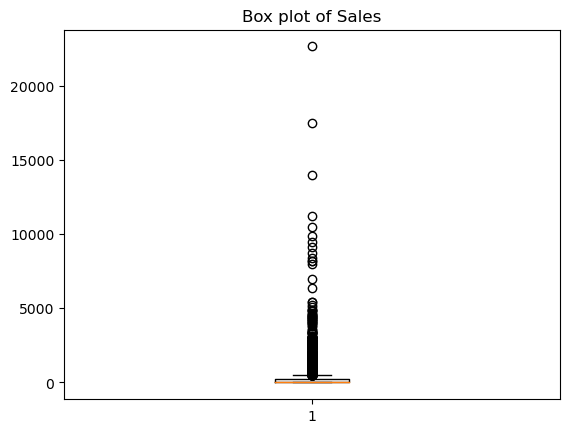

In [12]:
# Box plot untuk outliers kolom sales
plt.boxplot(sales['Sales'])
plt.title('Box plot of Sales')
plt.show()

In [13]:
                    # Mencari Outliers di kolom Quantity

Q1 = sales['Quantity'].quantile(0.25)
Q3 = sales['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan bawah untuk mendeteksi outliers
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR


# Mendeteksi outliers
outliers_qty = sales[(sales['Quantity'] < batas_bawah) | (sales['Quantity'] > batas_atas)]
outliers_qty.head()

# Setelah dilakukan pengecekkan, untuk outliers di kolom Quantity tidak dibuang karena akan digunakan untuk analisa 

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year
113,114,AMER-2020-115259,2020-08-25,20200825,Rebecca Dickens,Mexico,Mexico City,AMER,LATAM,Amazon,1004,Tech,SMB,Storage,1DRXSUGWY6,40.096,14,0.2,14.5348,2020
139,140,AMER-2022-145583,2022-10-14,20221014,Rose Scott,United States,Aurora,AMER,NAMER,CVS Health,1026,Retail,SMB,SaaS Connector Pack,6LLWK12W7K,43.120,14,0.0,20.6976,2022
147,148,EMEA-2022-114489,2022-12-06,20221206,Joseph Duncan,Italy,Rome,EMEA,EU,Walmart,1096,Retail,Strategic,Site Analytics,NKEP466WY8,384.450,11,0.0,103.8015,2022
251,252,AMER-2022-145625,2022-09-12,20220912,Penelope Nash,United States,Seattle,AMER,NAMER,Home Depot,1047,Retail,SMB,Data Smasher,4LV39UJCC2,3347.370,13,0.0,636.0003,2022
329,330,EMEA-2022-141544,2022-08-31,20220831,Peter McLean,France,Paris,EMEA,EU-WEST,Pfizer,1074,Healthcare,SMB,FinanceHub,QWKHH67GTN,100.240,10,0.2,33.8310,2022


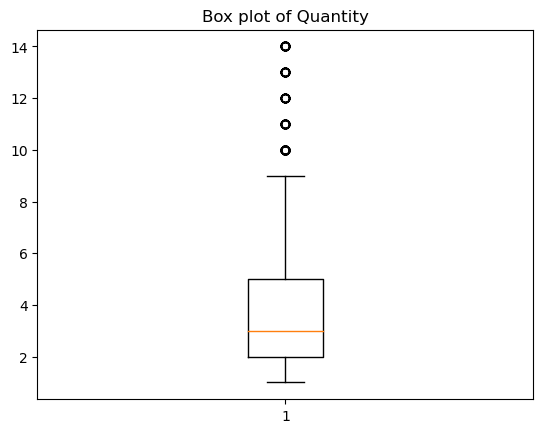

In [14]:
# Box plot untuk outliers kolom Quantity
plt.boxplot(sales['Quantity'])
plt.title('Box plot of Quantity')
plt.show()

In [15]:
                    # Mencari Outliers di kolom Discount

Q1 = sales['Discount'].quantile(0.25)
Q3 = sales['Discount'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan bawah untuk mendeteksi outliers
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

# Mendeteksi outliers
outliers_disc = sales[(sales['Discount'] < batas_bawah) | (sales['Discount'] > batas_atas)]
outliers_disc.head()

# setelah dilakukan pengecekkan, untuk outliers di kolom Discount tidak dibuang karena akan digunakan untuk analisa 

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year
14,15,APJ-2021-118983,2021-11-22,20211122,Emily Morrison,Japan,Saitama,APJ,JAPN,Pfizer,1074,Healthcare,Enterprise,OneView,D8FGC56NNX,68.810,5,0.8,-123.8580,2021
15,16,APJ-2021-118983,2021-11-22,20211122,Emily Morrison,Japan,Saitama,APJ,JAPN,Pfizer,1074,Healthcare,Enterprise,ContactMatcher,NRKT5R1A1G,2.544,3,0.8,-3.8160,2021
28,29,EMEA-2021-150630,2021-09-17,20210917,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,ContactMatcher,BGL4P1U2CZ,9.618,2,0.7,-7.0532,2021
32,33,EMEA-2021-150630,2021-09-17,20210917,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,ContactMatcher,GPQ0TDTGIM,6.858,6,0.7,-5.7150,2021
36,37,APJ-2022-117590,2022-12-09,20221209,Chloe Short,Japan,Aichi,APJ,JAPN,Procter & Gamble,1077,Consumer Products,Strategic,SaaS Connector Pack,TKN9K1JO1D,190.920,5,0.6,-147.9630,2022


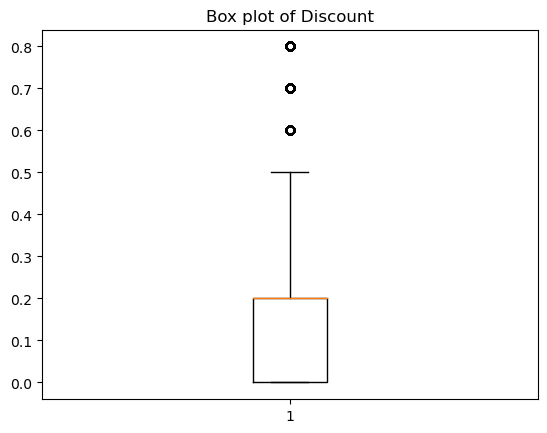

In [16]:
# Box plot untuk outliers kolom Discount
plt.boxplot(sales['Discount'])
plt.title('Box plot of Discount')
plt.show()

In [17]:
                        # Mencari Outliers di kolom Profit

Q1 = sales['Profit'].quantile(0.25)
Q3 = sales['Profit'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan bawah untuk mendeteksi outliers
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR


# Mendeteksi outliers
outliers_profit = sales[(sales['Profit'] < batas_bawah) | (sales['Profit'] > batas_atas)]
outliers_profit.head()

# setelah dilakukan pengecekkan, untuk outliers di kolom Profit tidak dibuang karena akan digunakan untuk analisa

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,2022
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,2021
7,8,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152,2020
10,11,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,43NZ37VE2D,1706.1840,9,0.20,85.3092,2020
13,14,AMER-2022-161389,2022-12-06,20221206,Adrian Abraham,Canada,Toronto,AMER,NAMER,Microsoft,1066,Tech,SMB,ContactMatcher,COK66F8IC1,407.9760,3,0.20,132.5922,2022


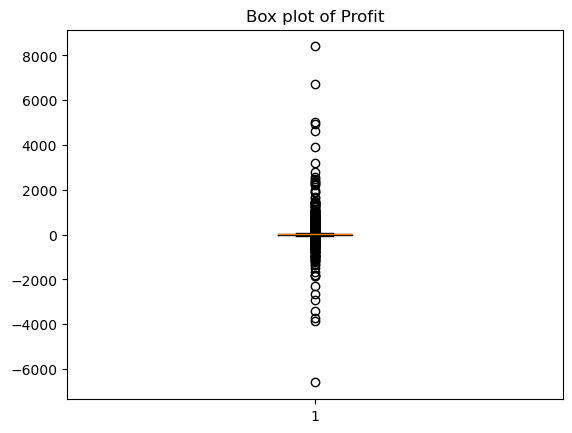

In [18]:
# Box plot untuk outliers kolom Profit
plt.boxplot(sales['Profit'])
plt.title('Box plot of Profit')
plt.show()

# Data Analysis #

**Uji Normalitas**

In [19]:
# uji normalitas untuk mengetahui apakah kolom Profit terdistribusi normal 
statistic, p_value = kstest(sales['Profit'],'norm')
alpha = 0.05

if p_value > alpha:
     print("data terdistribusi normal")
else:
     print("data tidak terdistribusi normal")
     
p_value


data tidak terdistribusi normal


0.0

In [20]:
# uji normalitas untuk mengetahui apakah kolom Discount terdistribusi normal 

statistic, p_value = kstest(sales['Discount'],'norm')
alpha = 0.05

if p_value > alpha:
     print("data terdistribusi normal")
else:
     print("data tidak terdistribusi normal")

p_value


data tidak terdistribusi normal


0.0

In [21]:
# uji normalitas untuk mengetahui apakah kolom Quantity terdistribusi normal 

statistic, p_value = kstest(sales['Quantity'],'norm')
alpha = 0.05

if p_value > alpha:
     print("data terdistribusi normal")
else:
     print("data tidak terdistribusi normal")

p_value


data tidak terdistribusi normal


0.0

In [22]:
# uji normalitas untuk mengetahui apakah kolom Sales terdistribusi normal 

statistic, p_value = kstest(sales['Sales'],'norm')
alpha = 0.05

if p_value > alpha:
     print("data terdistribusi normal")
else:
     print("data tidak terdistribusi normal")
     
p_value



data tidak terdistribusi normal


0.0

In [23]:
# menampilkan profit margin (%) per tahun

sales_profit = sales.groupby(['Year'])[['Quantity', 'Sales', 'Profit']].sum().sort_values(by = 'Year').reset_index()
sales_profit['Profit Margin(%)'] = (sales_profit['Profit'] / sales_profit['Sales'])*100
sales_profit

,Year,Quantity,Sales,Profit,Profit Margin(%)
0,2020,7581,484247.4981,49543.9741,10.231126
1,2021,7979,470532.5090,61618.6037,13.095504
2,2022,9810,608473.8300,81726.9308,13.431462
3,2023,12503,733947.0232,93507.5131,12.740363


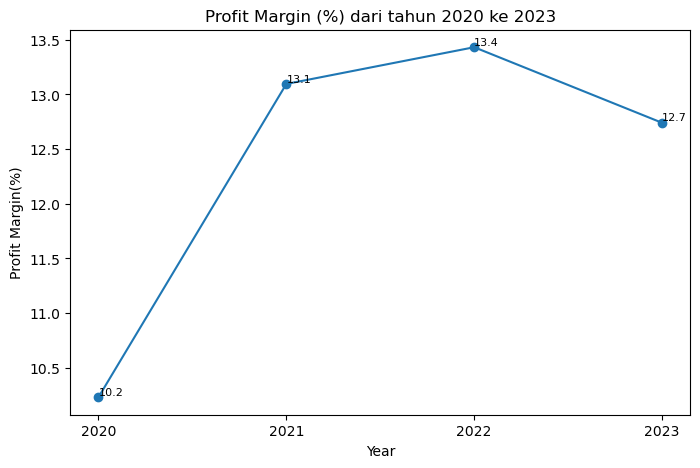

In [24]:
# Membuat Line Chart
plt.figure(figsize= (8,5))
plt.plot(sales_profit['Year'],
         sales_profit['Profit Margin(%)'], marker = 'o')

# Menambahkan label data pada Line Chart
for i,txt in enumerate(sales_profit['Profit Margin(%)']):
    plt.text(sales_profit["Year"][i], 
             sales_profit["Profit Margin(%)"][i], 
             f'{txt:.1f}', fontsize=8, ha='left',va='bottom')

# Membuat set label dan judul
plt.title('Profit Margin (%) dari tahun 2020 ke 2023')
plt.xlabel('Year')
plt.ylabel('Profit Margin(%)')
plt.xticks(sales_profit['Year'])
plt.show()

**Analisa 1: Bagaimana tren profit margin(%) dari tahun ke tahun**

Profit Margin adalah rasio keuangan yang mengukur seberapa efisien perusahaan dalam menghasilkan keuntungan dari penjualan.
Dari grafik dapat dilihat bahwa terdapat penurunan profit margin(%) dari tahun 2022 ke 2023, ini menujukkan ada penurunan efisiensi dari perusahaan sehingga dapat dicek biaya-biaya apa saja yang naik di tahun 2023 

Korelasi Spearman antara Discount dan Profit: SignificanceResult(statistic=-0.5433501822306213, pvalue=0.0)


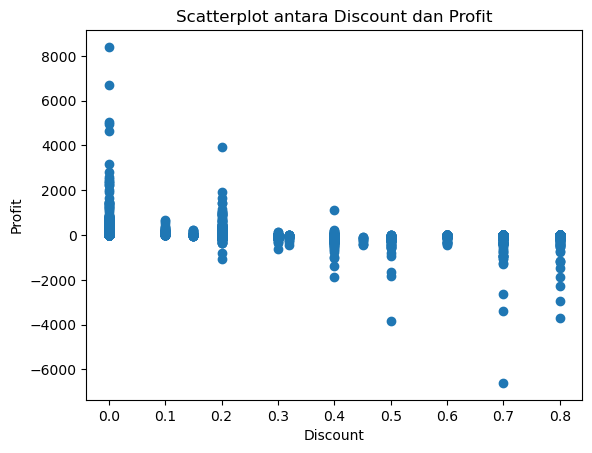

In [25]:
# Uji korelasi antara profit dengan diskon untuk mencari tahu jenis hubungan antara profit dengan diskon
# dikarenakan distribusi data kolom profit dan diskon tidak normal maka menggunakan Spearman
correlation = spearmanr(sales['Discount'], sales['Profit'])
print("Korelasi Spearman antara Discount dan Profit:", correlation)

# Scatter Plot
plt.scatter(sales['Discount'], sales['Profit'])
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Scatterplot antara Discount dan Profit')
plt.show()

# Ada hubungan antara diskon dengan profit dikarenakan p value < 0.05

In [26]:
sales[['Discount', 'Profit']].corr('spearman')

,Discount,Profit
Discount,1.00000,-0.54335
Profit,-0.54335,1.00000



**Insight**

ada hubungan berbanding terbalik(korelasi negatif) antara profit dan diskon, yaitu jika profit naik maka diskon turun dan jika profit turun maka diskon naik, dengan presentase keterikatan di 54 %  

In [27]:
# Menambah kolom profit minus per qty
profitminus = sales.groupby(['Product']).agg({'Profit' :'sum','Quantity' :'sum'}).sort_values(by = 'Profit',ascending=True).reset_index()
profitminus['Profit per Qty'] = profitminus['Profit']/profitminus['Quantity']
profitminus.head(5)


,Product,Profit,Quantity,Profit per Qty
0,Marketing Suite,-3472.5560,868,-4.000641
1,Storage,949.5182,914,1.038860
2,Big Ol Database,3384.7569,440,7.692629
3,ChatBot Plugin,6527.7870,3000,2.175929
4,SaaS Connector Pack - Gold,6964.1767,906,7.686729


**Analisa 2 : Apa yang menyebabkan produk berprofit rugi**

- Dikarenakan dari uji Spearman ada hubungan korelasi negatif antara profit dan diskon, dimana semakin rendah profit maka diskon semakin tinggi, maka pemberian diskon yang tinggi dapat menjadi penyebab kenapa ada produk yang profitnya rendah. 
- Melihat dari tabel di atas untuk produk per qty dari Marketing Suite sudah minus dari harga per satuannya, sehingga menyebabkan harga jualnya minus, perlu ditinjau kembali untuk biaya produksi dari aplikasi Marketing Suite

In [28]:
# Top 3 produk yang menghasilkan profit tertinggi
profittinggi = sales.groupby(['Product'])['Profit'].sum().sort_values(ascending=False).reset_index()
profittinggi.head(3)

,Product,Profit
0,Alchemy,55617.8249
1,Site Analytics,44515.7306
2,Data Smasher,41936.6357


In [29]:
# Top 5 negara yang membeli produk Alchemy
produkprofitnegara = sales[(sales['Product'] == 'Alchemy')]['Country'].value_counts().head(5).reset_index()
produkprofitnegara

,Country,count
0,United States,17
1,United Kingdom,8
2,Canada,5
3,Japan,5
4,France,5


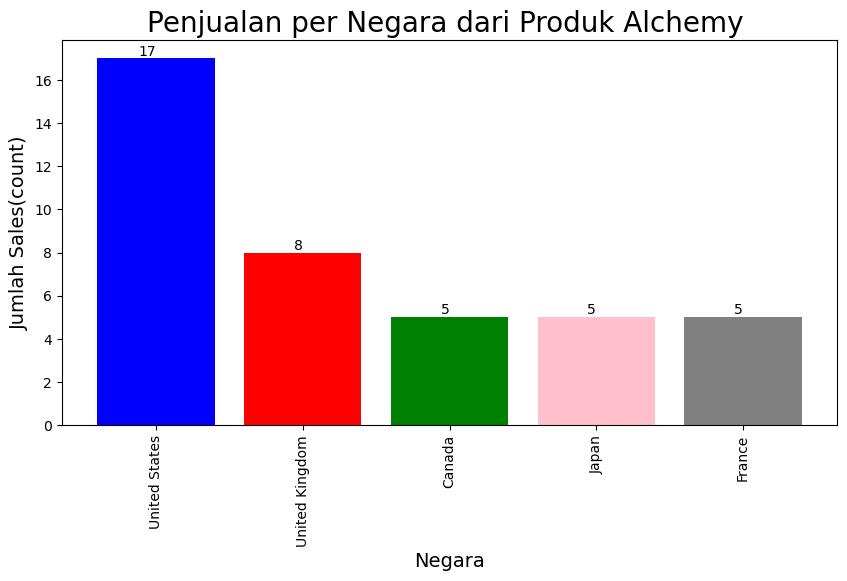

In [71]:
# Menentukan warna 
colors = ['blue','red','green','pink','grey']
# Membuat Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(produkprofitnegara['Country'], sales[(sales['Product'] == 'Alchemy')]['Country'].value_counts().head(5), color=colors)

# Menambahkan label data pada Line Chart
for i,txt in enumerate(produkprofitnegara['count']):
    plt.text(produkprofitnegara['Country'][i], 
             produkprofitnegara['count'][i], 
             f'{txt:.0f}', fontsize=10, ha='right',va='bottom')
    
# Menambahkan set label dan judul
plt.title('Penjualan per Negara dari Produk Alchemy ', size = 20)
plt.xlabel('Negara', size = 14)
plt.ylabel('Jumlah Sales(count)', size = 14)
plt.xticks(rotation=90)
plt.show()


In [31]:
# Top 5 negara yang membeli produk Site Analytics
produkprofitnegara2 = sales[(sales['Product'] == 'Site Analytics')]['Country'].value_counts().head(5).reset_index()
produkprofitnegara2

,Country,count
0,United States,172
1,United Kingdom,109
2,Japan,80
3,France,62
4,Mexico,47


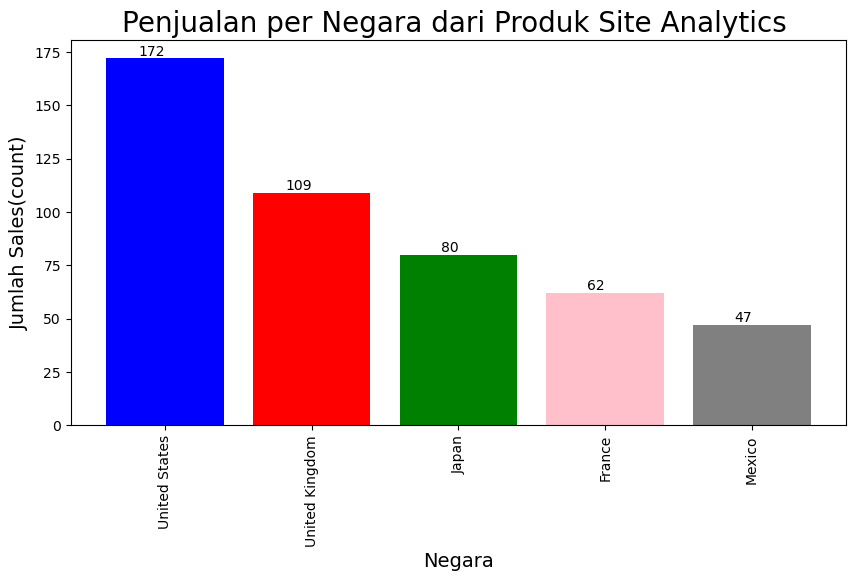

In [72]:
# Menentukan warna 
colors = ['blue','red','green','pink','grey']
# Membuat Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(produkprofitnegara2['Country'], sales[(sales['Product'] == 'Site Analytics')]['Country'].value_counts().head(5), color=colors)

# Menambahkan label data pada Line Chart
for i,txt in enumerate(produkprofitnegara2['count']):
    plt.text(produkprofitnegara2['Country'][i], 
             produkprofitnegara2['count'][i], 
             f'{txt:.0f}', fontsize=10, ha='right',va='bottom')
    
# Menambahkan set label dan judul
plt.title('Penjualan per Negara dari Produk Site Analytics ', size = 20)
plt.xlabel('Negara', size = 14)
plt.ylabel('Jumlah Sales(count)', size = 14)
plt.xticks(rotation=90)
plt.show()

In [33]:
# Top 5 negara yang membeli produk Data Smasher
produkprofitnegara3 = sales[(sales['Product'] == 'Data Smasher')]['Country'].value_counts().head(5).reset_index()
produkprofitnegara3

,Country,count
0,United States,147
1,Japan,81
2,United Kingdom,77
3,Canada,53
4,France,45


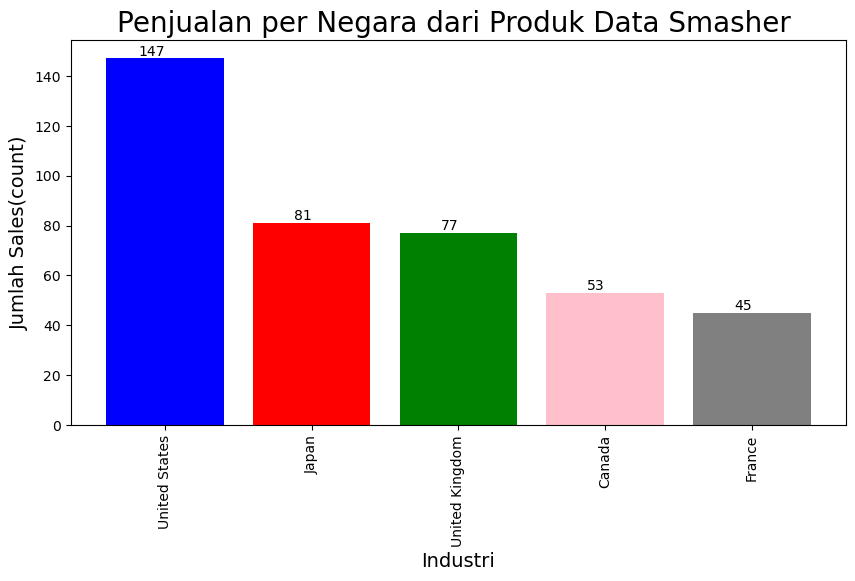

In [73]:
# Menentukan warna 
colors = ['blue','red','green','pink','grey']
# Membuat Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(produkprofitnegara3['Country'], sales[(sales['Product'] == 'Data Smasher')]['Country'].value_counts().head(5), color=colors)

# Menambahkan label data pada Line Chart
for i,txt in enumerate(produkprofitnegara3['count']):
    plt.text(produkprofitnegara3['Country'][i], 
             produkprofitnegara3['count'][i], 
             f'{txt:.0f}', fontsize=10, ha='right',va='bottom')
    
# Menambahkan set label dan judul
plt.title('Penjualan per Negara dari Produk Data Smasher ', size = 20)
plt.xlabel('Industri', size = 14)
plt.ylabel('Jumlah Sales(count)', size = 14)
plt.xticks(rotation=90)
plt.show()


**Insight**

Dari beberapa tabel di atas, dapat dilihat bahwa untuk negara:
- United States membeli produk profit tertinggi dengan jumlah 336
- United Kingdom dengan jumlah 194
- Japan dengan jumlah 166,

sehingga ada kesamaan negara yang banyak melakukan pembelian top 3 produk dengan profit tertinggi, dimana berasal dari negara United States, United Kingdom dan Japan. Perlu diperhatikan bahwa negara ini termasuk negara maju sehingga bisa dikatakan bahwa negara maju lebih cenderung untuk membeli produk dengan profit tinggi 

In [62]:
# Industri yang melakukan pembelian produk Alchemy
produkprofit= sales[(sales['Product'] == 'Alchemy')]['Industry'].value_counts().head(5).reset_index()
produkprofit

,Industry,count
0,Finance,16
1,Healthcare,9
2,Tech,9
3,Manufacturing,8
4,Consumer Products,8


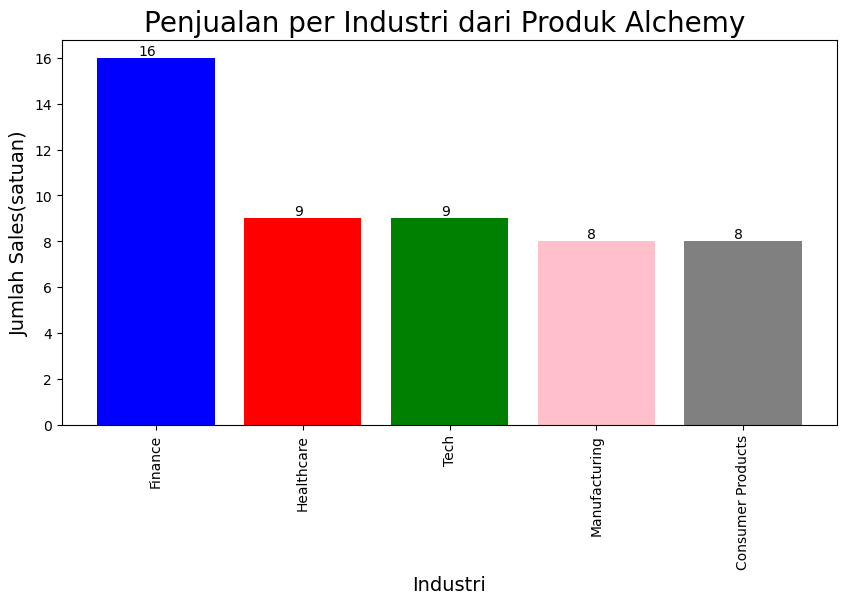

In [74]:
# Menentukan warna 
colors = ['blue','red','green','pink','grey','yellow','skyblue','orange','violet']
# Membuat Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(produkprofit['Industry'], sales[(sales['Product'] == 'Alchemy')]['Industry'].value_counts().head(5), color=colors)

# Menambahkan label data pada Line Chart
for i,txt in enumerate(produkprofit['count']):
    plt.text(produkprofit['Industry'][i], 
             produkprofit['count'][i], 
             f'{txt:.0f}', fontsize=10, ha='right',va='bottom')
    
# Menambahkan set label dan judul
plt.title('Penjualan per Industri dari Produk Alchemy ', size = 20)
plt.xlabel('Industri', size = 14)
plt.ylabel('Jumlah Sales(satuan)', size = 14)
plt.xticks(rotation=90)
plt.show()



In [64]:
# Industri yang melakukan pembelian produk Site Analytics
produkprofit2 = sales[(sales['Product'] == 'Site Analytics')]['Industry'].value_counts().head(5).reset_index()
produkprofit2

,Industry,count
0,Finance,176
1,Energy,131
2,Tech,121
3,Manufacturing,109
4,Retail,92


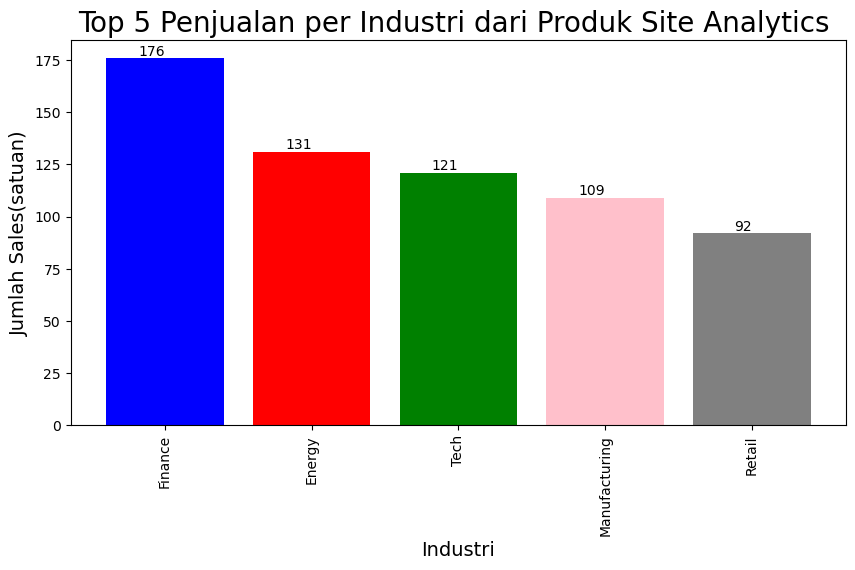

In [75]:
# Menentukan warna
colors = ['blue','red','green','pink','grey','yellow','skyblue','orange','violet','black']

# Membuat Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(produkprofit2['Industry'], sales[(sales['Product'] == 'Site Analytics')]['Industry'].value_counts().head(5),color = colors)

# Menambahkan label data pada Bar Chart
for i,txt in enumerate(produkprofit2['count']):
    plt.text(produkprofit2['Industry'][i], 
             produkprofit2['count'][i], 
             f'{txt:.0f}', fontsize=10, ha='right',va='bottom')
    
# Menambahkan set label dan judul
plt.title('Top 5 Penjualan per Industri dari Produk Site Analytics ', size = 20)
plt.xlabel('Industri', size = 14)
plt.ylabel('Jumlah Sales(satuan)', size = 14)
plt.xticks(rotation=90)
plt.show()

In [66]:
# Industri yang melakukan pembelian produk Data Smasher
produkprofit3 = sales[(sales['Product'] == 'Data Smasher')]['Industry'].value_counts().head(5).reset_index()
produkprofit3

,Industry,count
0,Finance,157
1,Energy,102
2,Manufacturing,92
3,Retail,90
4,Tech,86


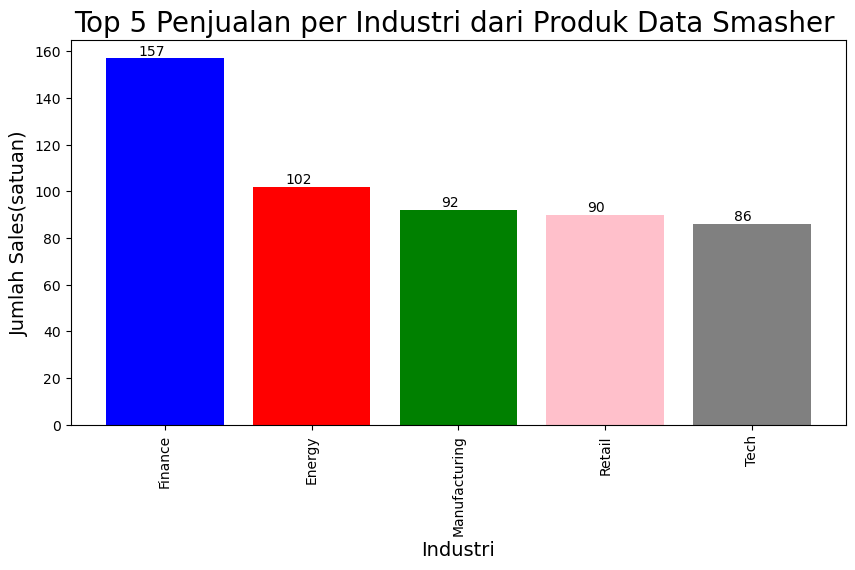

In [70]:
# Menentukan warna
colors = ['blue','red','green','pink','grey','yellow','skyblue','orange','violet','black']

# Membuat Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(produkprofit3['Industry'], sales[(sales['Product'] == 'Data Smasher')]['Industry'].value_counts().head(5),color=colors)

# Menambahkan label data pada Bar Chart
for i,txt in enumerate(produkprofit3['count']):
    plt.text(produkprofit3['Industry'][i], 
             produkprofit3['count'][i], 
             f'{txt:.0f}', fontsize=10, ha='right',va='bottom')
    
# Menambahkan set label dan judul
plt.title('Top 5 Penjualan per Industri dari Produk Data Smasher ', size = 20)
plt.xlabel('Industri', size = 14)
plt.ylabel('Jumlah Sales(satuan)', size = 14)
plt.xticks(rotation=90)
plt.show()

**Insight**

Jika melihat beberapa grafik penjualan per industri di atas, ada kesamaan industri yang banyak melakukan pembelian produk yang menghasilkan profit tertinggi yaitu dari industri Finance sebesar 349, Tech sebesar 220, Manufacturing sebesar 209

**Analisa 3: Apa saja produk dengan karakteristik profit tinggi**

Dari beberapa grafik di atas, dapat dilihat bahwa ada karakterisitik dari produk dengan profit tinggi yaitu :
- Negara Maju cenderung membeli produk dengan profit tinggi
- Industri Finance paling banyak membeli produk dengan profit tinggi, diikuti oleh Tech dan Manufacturing

Kebijakan marketing berikutnya dapat mempertimbangkan kedua hal ini

In [41]:
# Top 5 customer dengan profit tertinggi
profitpercust = sales.groupby(['Customer'])['Profit'].sum().sort_values(ascending=False).head(5).reset_index()
profittotal = sales['Profit'].sum()
profitpercust['Kontribusi(%)'] = profitpercust['Profit']/profittotal*100
profitpercust 



,Customer,Profit,Kontribusi(%)
0,Valero Energy,10308.6297,3.599419
1,Coca-Cola,9449.0246,3.299275
2,Trafigura Group,8867.8252,3.096340
3,Mondelez International,8577.6524,2.995022
4,Lowes,7937.4915,2.771499


In [42]:
# Total presentase dari top 5 Customer 

profitpercusttotal = profitpercust['Kontribusi(%)'].sum()
profitpercusttotal 

15.761554757816116

**Insight**

Jika ditotal secara presentase, maka 5 customer dengan profit tertinggi memberikan total kontribusi profit sebesar 15 %

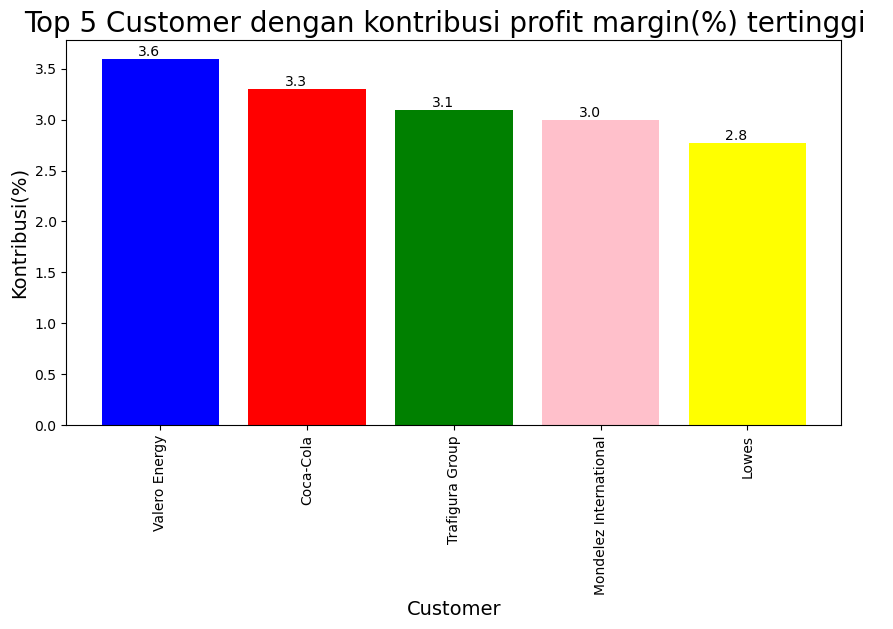

In [43]:
# Menentukan warna
colors = ['blue','red','green','pink','yellow']

# Membuat Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(profitpercust['Customer'],profitpercust['Kontribusi(%)'],color = colors)

# Menambahkan label data pada Bar Chart
for i,txt in enumerate(profitpercust['Kontribusi(%)']):
    plt.text(profitpercust['Customer'][i], 
             profitpercust['Kontribusi(%)'][i], 
             f'{txt:.1f}', fontsize=10, ha='right',va='bottom')
    
# Menambahkan set label dan judul
plt.title('Top 5 Customer dengan kontribusi profit margin(%) tertinggi  ', size = 20)
plt.xlabel('Customer', size = 14)
plt.ylabel('Kontribusi(%)', size = 14)
plt.xticks(rotation=90)
plt.show()

**Analisa 4: Customer apa saja yang memberikan kontribusi profit tertinggi** 

Top 5 customer yang memberikan kontribusi profit tinggi di antaranya seperti Valero Energy, Coca-Cola, Trafigura Group, Mondelez International, dan Lowes yang memberikan kontribusi total profit sebesar 15 %. Customer ini sangat penting bagi profit perusahaan ke depannya, sehingga diperlukan strategi untuk menjaga hubungan dengan customer tersebut.

In [44]:
# Produk yang paling banyak dibeli oleh customer Valero Energy
profit_cust = sales[(sales['Customer'] == 'Valero Energy')]['Product'].value_counts().head(5).reset_index()
profit_cust


,Product,count
0,ContactMatcher,17
1,Support,15
2,Data Smasher,13
3,Site Analytics,11
4,SaaS Connector Pack,10


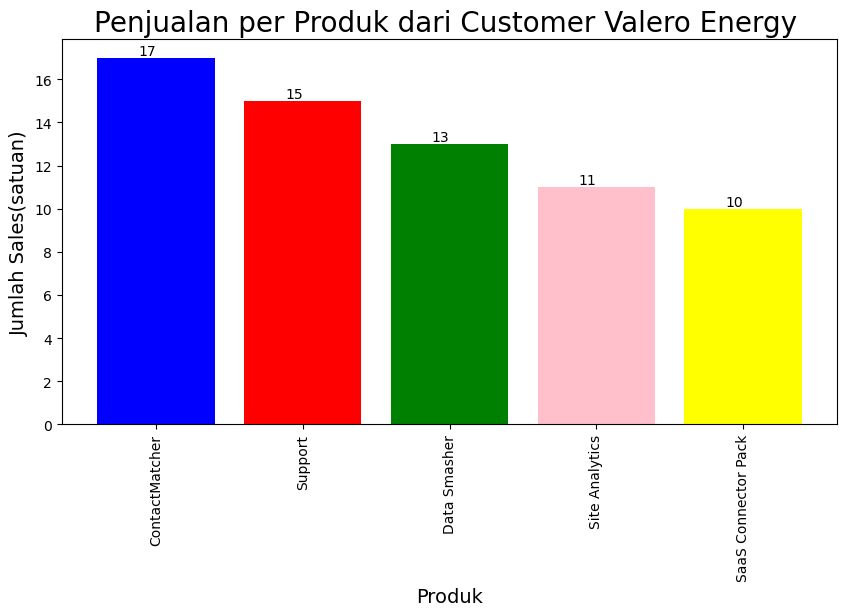

In [76]:
# Menentukan warna
colors = ['blue','red','green','pink','yellow']

# Membuat Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(profit_cust['Product'], sales[(sales['Customer'] == 'Valero Energy')]['Product'].value_counts().head(5),color = colors)

# Menambahkan label data pada Bar Chart
for i,txt in enumerate(profit_cust['count']):
    plt.text(profit_cust['Product'][i], 
             profit_cust['count'][i], 
             f'{txt:.0f}', fontsize=10, ha='right',va='bottom')
    
# Menambahkan set label dan judul
plt.title('Penjualan per Produk dari Customer Valero Energy ', size = 20)
plt.xlabel('Produk', size = 14)
plt.ylabel('Jumlah Sales(satuan)', size = 14)
plt.xticks(rotation=90)
plt.show()

In [46]:
# Produk yang paling banyak dibeli oleh customer Coca Cola
profit_cust2 = sales[(sales['Customer'] == 'Coca-Cola')]['Product'].value_counts().head(5).reset_index()
profit_cust2

,Product,count
0,ContactMatcher,13
1,Support,13
2,Marketing Suite - Gold,11
3,SaaS Connector Pack,9
4,ChatBot Plugin,9


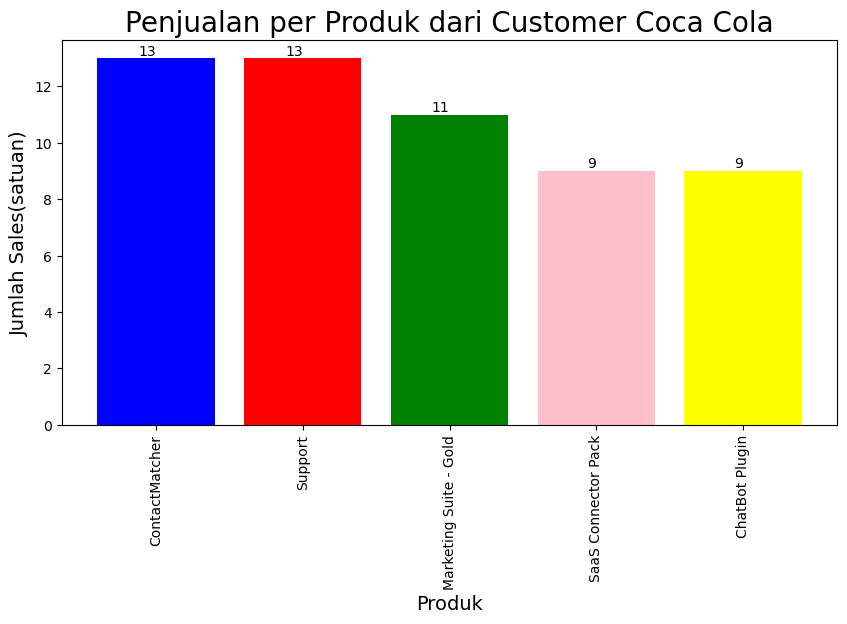

In [77]:
# Menentukan warna
colors = ['blue','red','green','pink','yellow']

# Membuat Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(profit_cust2['Product'], sales[(sales['Customer'] == 'Coca-Cola')]['Product'].value_counts().head(5),color = colors)

# Menambahkan label data pada Bar Chart
for i,txt in enumerate(profit_cust2['count']):
    plt.text(profit_cust2['Product'][i], 
             profit_cust2['count'][i], 
             f'{txt:.0f}', fontsize=10, ha='right',va='bottom')
    
# Menambahkan set label dan judul
plt.title('Penjualan per Produk dari Customer Coca Cola',size = 20)
plt.xlabel('Produk', size = 14)
plt.ylabel('Jumlah Sales(satuan)', size = 14)
plt.xticks(rotation=90)
plt.show()

In [48]:
# Produk yang paling banyak dibeli oleh customer Trafigura Group
profit_cust3 = sales[(sales['Customer'] == 'Trafigura Group')]['Product'].value_counts().head(5).reset_index()
profit_cust3

,Product,count
0,Support,15
1,ContactMatcher,14
2,SaaS Connector Pack,12
3,Data Smasher,12
4,ChatBot Plugin,11


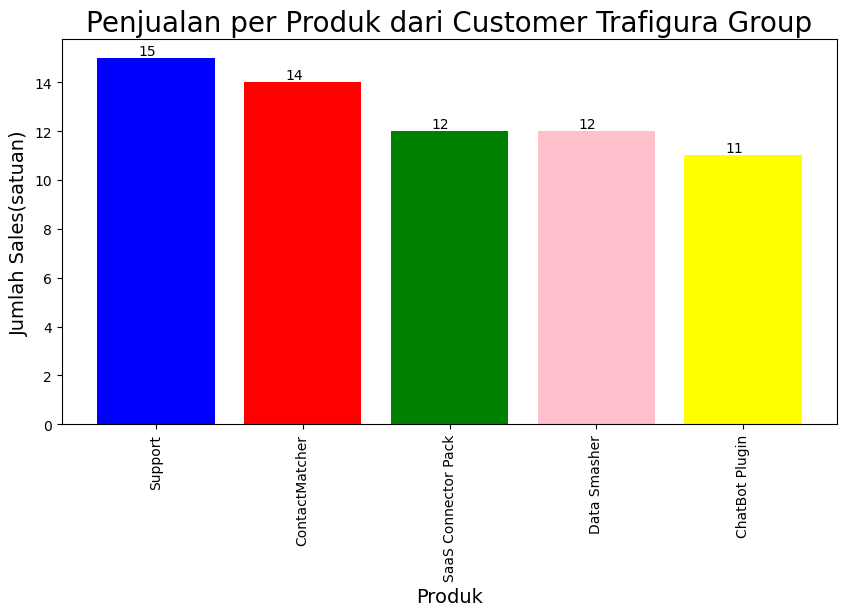

In [78]:
# Menentukan warna
colors = ['blue','red','green','pink','yellow']

# Membuat Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(profit_cust3['Product'], sales[(sales['Customer'] == 'Trafigura Group')]['Product'].value_counts().head(5),color = colors)

# Menambahkan label data pada Bar Chart
for i,txt in enumerate(profit_cust3['count']):
    plt.text(profit_cust3['Product'][i], 
             profit_cust3['count'][i], 
             f'{txt:.0f}', fontsize=10, ha='right',va='bottom')
    
# Menambahkan set label dan judul
plt.title('Penjualan per Produk dari Customer Trafigura Group',size = 20)
plt.xlabel('Produk', size = 14)
plt.ylabel('Jumlah Sales(satuan)', size = 14)
plt.xticks(rotation=90)
plt.show()

In [50]:
# Produk yang paling banyak dibeli oleh customer Mondelez International
profit_cust4 = sales[(sales['Customer'] == 'Mondelez International')]['Product'].value_counts().head(5).reset_index()
profit_cust4

,Product,count
0,ContactMatcher,25
1,ChatBot Plugin,19
2,FinanceHub,19
3,SaaS Connector Pack,18
4,Support,15


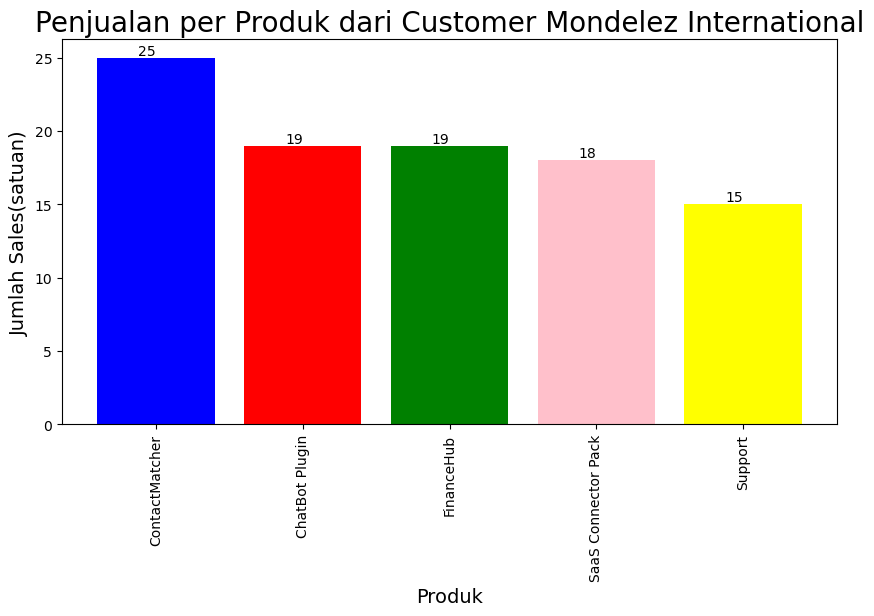

In [79]:
# Menentukan warna
colors = ['blue','red','green','pink','yellow']

# Membuat Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(profit_cust4['Product'], sales[(sales['Customer'] == 'Mondelez International')]['Product'].value_counts().head(5),color = colors)

# Menambahkan label data pada Bar Chart
for i,txt in enumerate(profit_cust4['count']):
    plt.text(profit_cust4['Product'][i], 
             profit_cust4['count'][i], 
             f'{txt:.0f}', fontsize=10, ha='right',va='bottom')
    
# Menambahkan set label dan judul
plt.title('Penjualan per Produk dari Customer Mondelez International',size = 20)
plt.xlabel('Produk', size = 14)
plt.ylabel('Jumlah Sales(satuan)', size = 14)
plt.xticks(rotation=90)
plt.show()

In [52]:
# Produk yang paling banyak dibeli oleh customer Lowes
profit_cust5 = sales[(sales['Customer'] == 'Lowes')]['Product'].value_counts().head(5).reset_index()
profit_cust5

,Product,count
0,ContactMatcher,20
1,SaaS Connector Pack,15
2,Data Smasher,11
3,Marketing Suite - Gold,10
4,Support,9


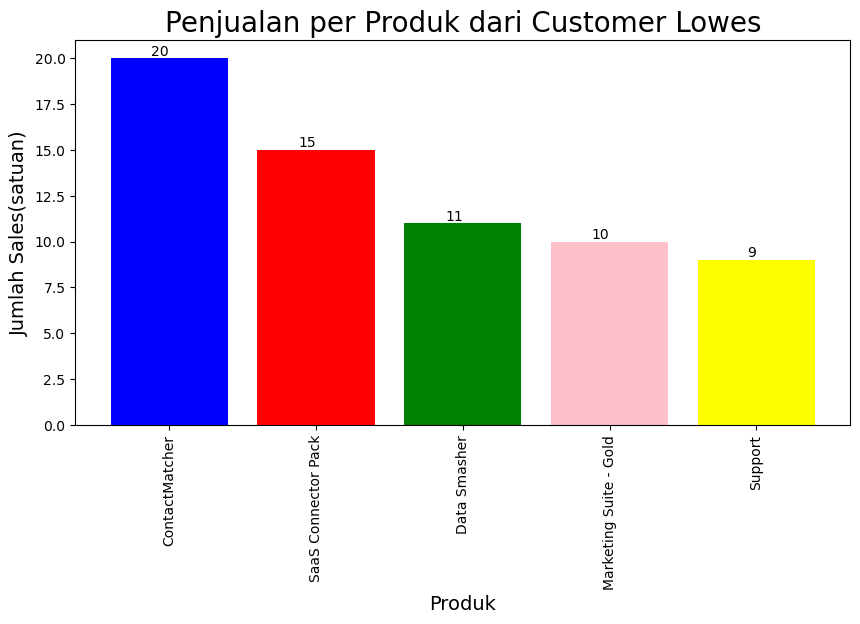

In [80]:
# Menentukan warna
colors = ['blue','red','green','pink','yellow']

# Membuat Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(profit_cust5['Product'], sales[(sales['Customer'] == 'Lowes')]['Product'].value_counts().head(5),color = colors)

# Menambahkan label data pada Bar Chart
for i,txt in enumerate(profit_cust5['count']):
    plt.text(profit_cust5['Product'][i], 
             profit_cust5['count'][i], 
             f'{txt:.0f}', fontsize=10, ha='right',va='bottom')
    
# Menambahkan set label dan judul
plt.title('Penjualan per Produk dari Customer Lowes',size = 20)
plt.xlabel('Produk', size = 14)
plt.ylabel('Jumlah Sales(satuan)', size = 14)
plt.xticks(rotation=90)
plt.show()

In [54]:
sales.to_csv('salesrev.csv')

**Analisa 5: Produk apa saja yang paling banyak dibeli customer dengan profit tinggi**

Jika melihat grafik penjualan per produk dari customer, maka:
- total product Contact Matcher yang terjual dari 5 customer sebesar 89
- Support sebesar 67
- Saas Connector Pack sebesar 64

Customer Valero Energy, Coca Cola, Mondelez International, Trafigura Group dan Lowes paling banyak membeli produk Contact Matcher. Dapat dilihat bahwa produk Contact Matcher adalah produk yang paling banyak dibeli customer dengan profit tinggi, sehingga dapat lebih difokuskan untuk pengembangan dari produk Contact Matcher ke depannya.

# Kesimpulan #

Dari hasil analisa dapat ditarik kesimpulan sebagai berikut :
- Adanya penurunan presentase profit margin dari tahun 2022 ke 2023
- Adanya hubungan korelasi negatif antara diskon dan profit dimana semakin tinggi diskon maka semakin rendah juga profitnya
- Untuk produk per qty dari Marketing Suite ada minus dari harga per satuannya, sehingga menyebabkan harga jual totalnya minus, perlu ditinjau kembali untuk biaya produksi dari aplikasi Marketing Suite
- Produk dengan profit paling tinggi adalah Alchemy, Site Analytics dan Data Smasher
- Customer yang membeli produk dengan profit paling tinggi sebagian besar dari industri Finance, diikuti Tech dan Manufacturing
- Negara yang paling banyak membeli produk dengan profit tinggi berasal dari United States, United Kingdom dan Japan dimana merupakan negara maju
- Ada 5 customer yang memberikan kontribusi profit tertinggi yaitu Valero Energy, Coca-Cola, Trafigura Group, Mondelez International, dan Lowes 
- Customer dengan profit paling tinggi paling banyak membeli produk Contact Matcher




## Rekomendasi ##
1. Dikarenakan adanya penurunan profit margin dalam presentase dari tahun 2022 ke 2023, maka dapat dicek apa saja biaya-biaya yang mengalami kenaikan, sehingga dapat dilakukan penggantian vendor atau melakukan efisiensi dari sisi tenaga kerja bila dibutuhkan   
2. Dikarenakan ada hubungan korelasi negatif antara diskon dan profit, dapat memberikan diskon yang lebih rendah saat memberikan penawaran produk untuk meningkatkan profit 
3. Perlu ditinjau kembali untuk biaya produksi dari aplikasi Marketing Suite dikarenakan harga satuannya minus
3. Dari hasil analisa produk dengan profit tinggi maka dapat disarankan untuk :
- Campaign marketing dapat lebih diarahkan ke industri Finance, Tech dan Manufacturing agar profit lebih maksimal
- Dapat Mendevelop produk yang sesuai dengan kebutuhan industri Finance, Tech dan Manufacturing
- Sasaran negara campaign marketing dapat lebih diarahkan ke United States, United Kingdom dan Japan 
4. Untuk 5 customer dengan profit paling tinggi dapat diberikan hadiah/perlakuan istimewa untuk menjaga hubungan jangka panjang seperti :
- memberikan hadiah saat event tertentu
- memberikan bonus free trial aplikasi baru/aplikasi favorit 
5. Dari hasil analisa customer dengan profit tinggi maka disarankan untuk lebih fokus mendevelop produk Contact Matcher dengan tambahan fitur agar semakin disukai customer
